Tri Utami Gita Cahyani / 4112322012 / Statistika Terapan dan Komputasi

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score

# Reading Data

In [2]:
!wget https://raw.githubusercontent.com/geetacahya/Clustering-Data-Negara/refs/heads/main/DataEkonomiNegara.csv

!wget https://raw.githubusercontent.com/geetacahya/Clustering-Data-Negara/refs/heads/main/data-dictionary.csv

--2025-04-29 10:12:48--  https://raw.githubusercontent.com/geetacahya/Clustering-Data-Negara/refs/heads/main/DataEkonomiNegara.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘DataEkonomiNegara.csv’

DataEkonomiNegara.c 100%[===================>]   9.01K  --.-KB/s    in 0s      

2025-04-29 10:12:48 (94.7 MB/s) - ‘DataEkonomiNegara.csv’ saved [9229/9229]

--2025-04-29 10:12:48--  https://raw.githubusercontent.com/geetacahya/Clustering-Data-Negara/refs/heads/main/data-dictionary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sen

In [3]:
df = pd.read_csv('DataEkonomiNegara.csv')
print("Data Indikator Sosial Ekonomi dan Kesehatan Menurut Negara")
df.head()

Data Indikator Sosial Ekonomi dan Kesehatan Menurut Negara


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Understanding Data

In [4]:
df_dictionary = pd.read_csv('data-dictionary.csv')
print("Deskripsi Variabel Dataset")
print(df_dictionary.to_string())

Deskripsi Variabel Dataset
  Column Name                                                                                                       Description
0     country                                                                                               Name of the country
1  child_mort                                                       Death of children under 5 years of age per 1000 live births
2     exports                                                     Exports of goods and services. Given as %age of the Total GDP
3      health                                                                        Total health spending as %age of Total GDP
4     imports                                                     Imports of goods and services. Given as %age of the Total GDP
5      Income                                                                                             Net income per person
6   Inflation                                                        The meas

In [5]:
df.shape

(167, 10)

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Data Cleaning

In [8]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


# Visualisasi Data

In [9]:
data=df.drop(['country'],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Heatmap

<Axes: >

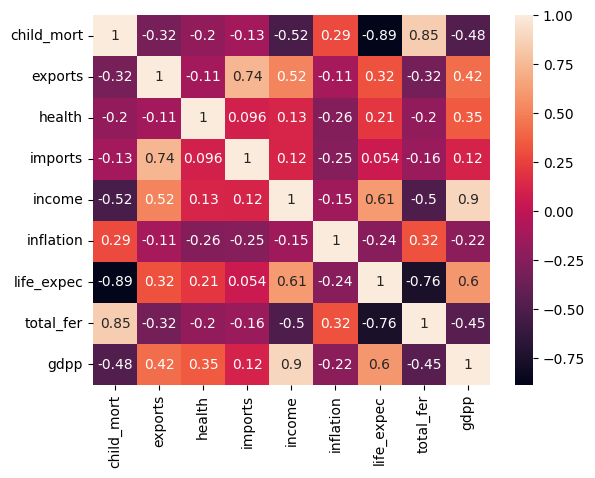

In [10]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

## Pairplot

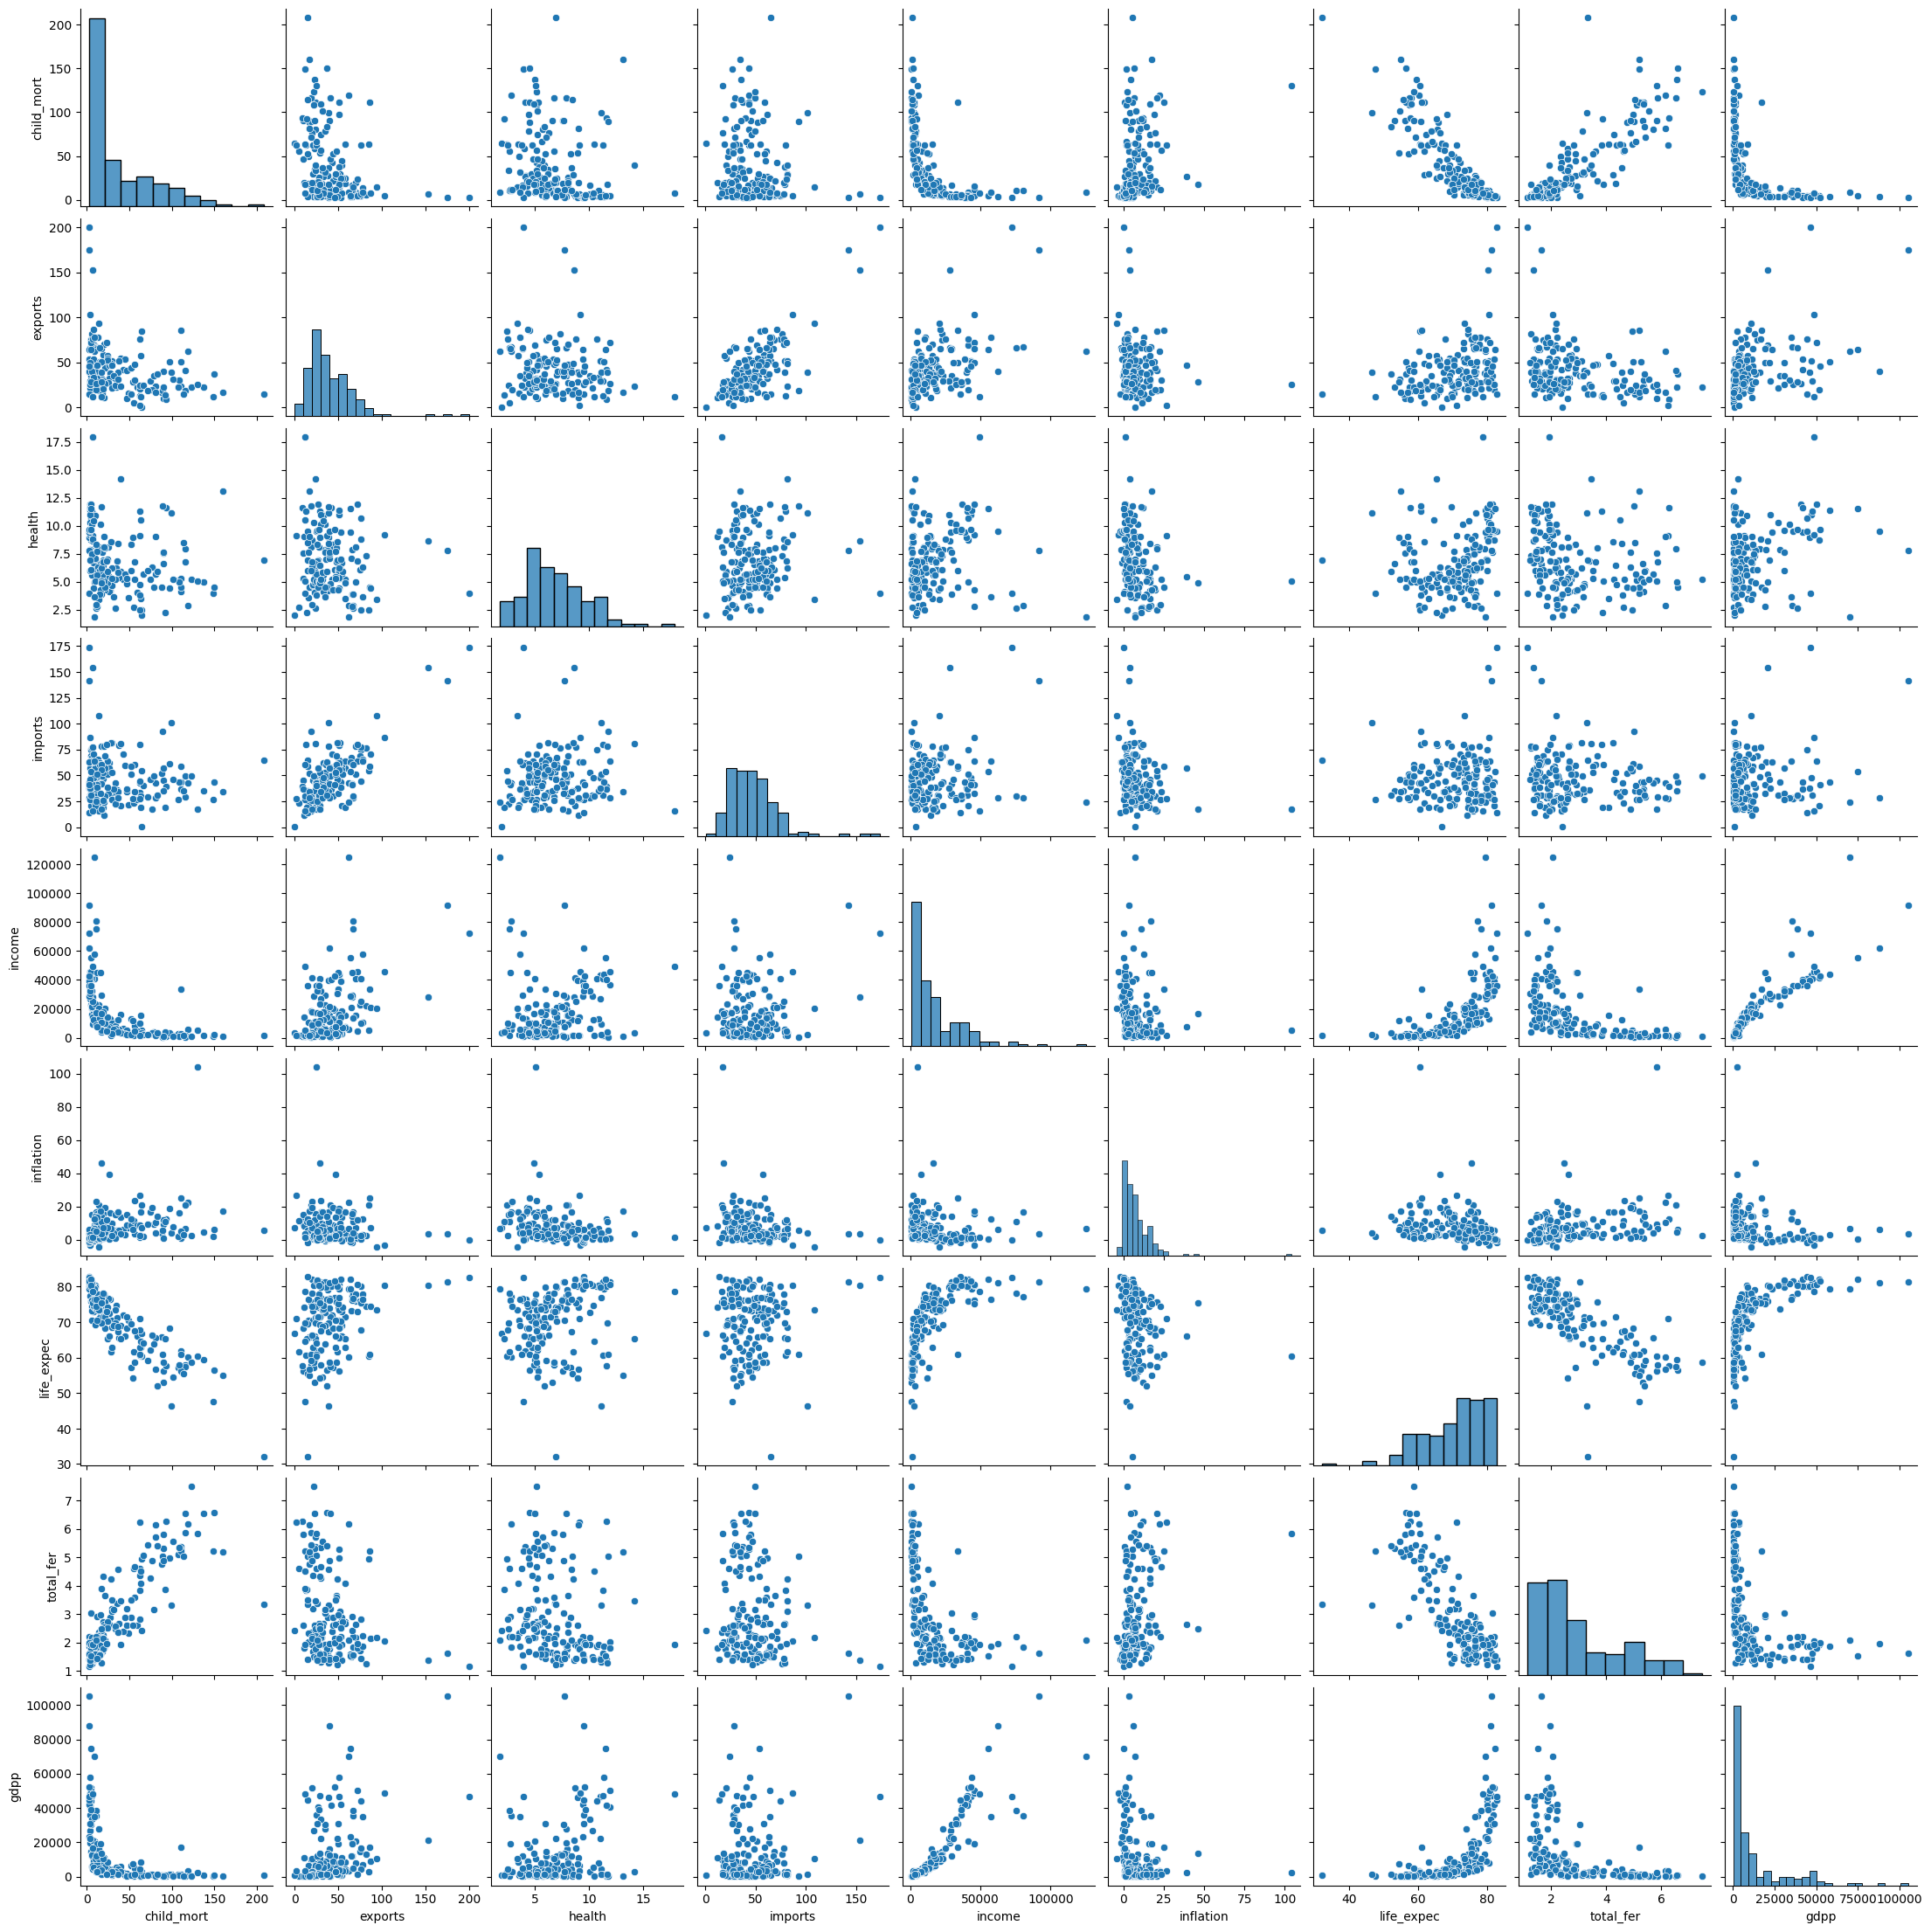

In [11]:
sns.pairplot(data)

# Data Preparation

In [12]:
scaled=StandardScaler()
data_scaled=scaled.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Principal Component Analysis

In [13]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(data_scaled)
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [-0.20062815,  0.05933283, -0.00727646,  0.03003154, -0.16034699,
        -0.06628537,  0.60112652,  0.75068875, -0.01677876],
       [ 0.07948854,  0.70730269,  0.24983051, -0.59218953, -0.09556237,
        -0.10463252, -0.01848639, -0.02882643, -0.24299776],
       [ 0.68274306,  0.01419742, -0.07249683,  0.02894642, -0

In [14]:
# Variance Ratio

pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Variance Ratio')

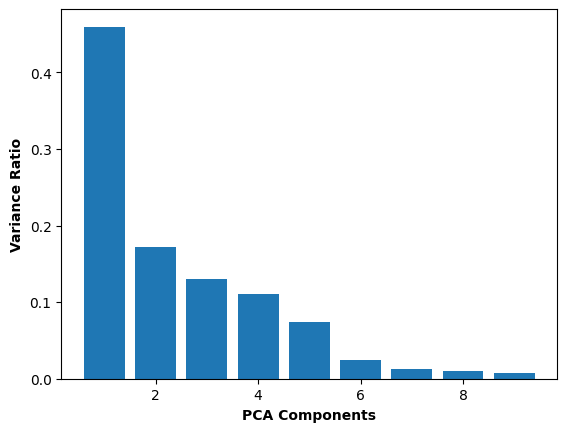

In [15]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [16]:
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


Text(0, 0.5, 'Cumulative Explained Variance')

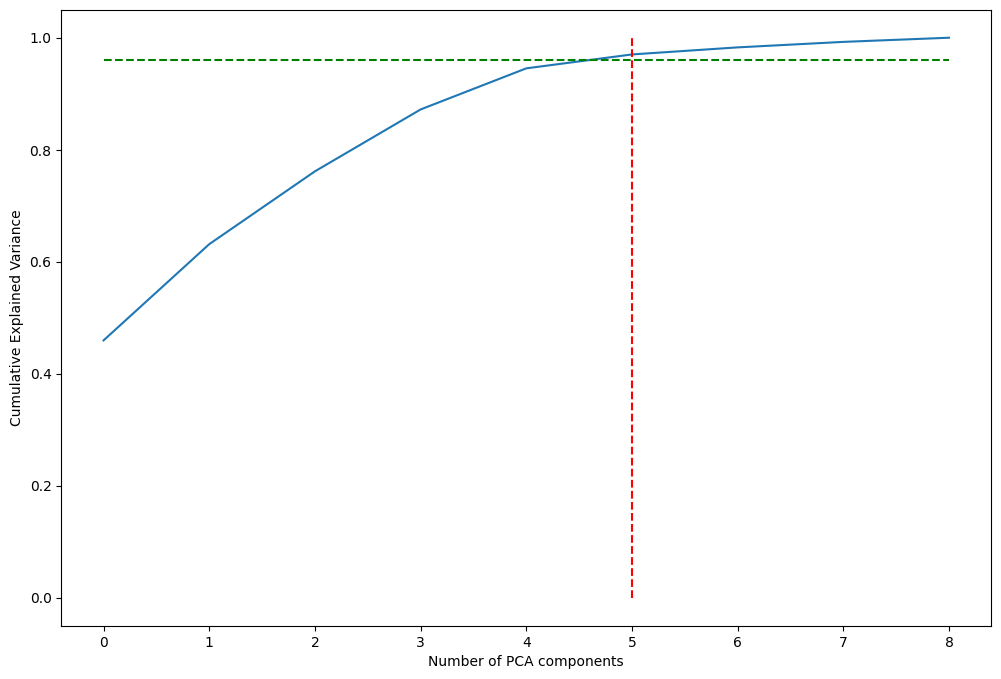

In [17]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [18]:
#Principal Component Data Decomposition
colnames = list(data.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


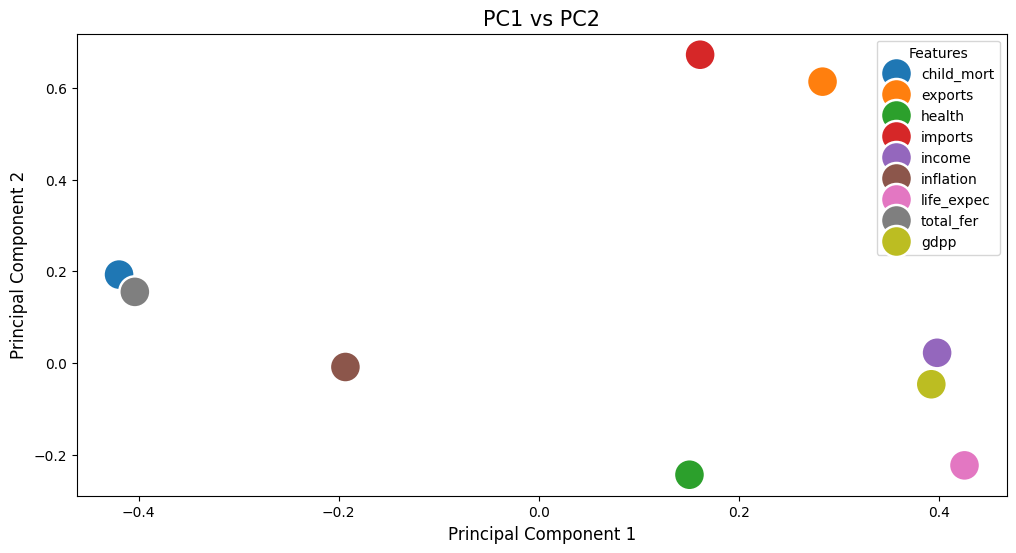

In [19]:
# Visualize 2 main PCs
fig = plt.figure(figsize = (12,6))
# Use x and y keywords to specify the columns for the scatterplot
sns.scatterplot(x='PC1', y='PC2', hue='Features', data=pca_data, marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

In [20]:
inc_pca = IncrementalPCA(n_components=5)

In [21]:
df_inc_pca = inc_pca.fit_transform(data_scaled)
df_inc_pca

array([[-2.91299992e+00,  9.19694483e-02, -7.21242475e-01,
         1.00183771e+00, -1.46764708e-01],
       [ 4.29869882e-01, -5.89373005e-01, -3.28611009e-01,
        -1.16501385e+00,  1.53205240e-01],
       [-2.85288747e-01, -4.52138721e-01,  1.23205055e+00,
        -8.57767020e-01,  1.91227155e-01],
       [-2.93271361e+00,  1.69877055e+00,  1.52507602e+00,
         8.55595497e-01, -2.14777969e-01],
       [ 1.03337146e+00,  1.33852736e-01, -2.16699200e-01,
        -8.46637655e-01, -1.93186250e-01],
       [ 2.28903436e-02, -1.77273550e+00,  8.64499533e-01,
        -3.67466174e-02,  9.97895254e-01],
       [-1.01463164e-01, -5.67317984e-01,  2.48106950e-01,
        -1.46602345e+00, -8.58319260e-02],
       [ 2.34215326e+00, -1.98970971e+00,  1.98795068e-01,
         1.11341263e+00, -7.10653789e-01],
       [ 2.97384111e+00, -7.35152104e-01, -5.28284369e-01,
         1.20110137e+00,  8.01665136e-02],
       [-1.81302843e-01, -3.96894805e-01,  8.68398935e-01,
        -4.35201409e-01

In [22]:
df_pca = pd.DataFrame(df_inc_pca, columns=["PC1","PC2","PC3","PC4","PC5"])
df_pca_final = pd.concat([df['country'], df_pca], axis=1)
df_pca_final.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186


# K-Means Clustering

## Elbow Method

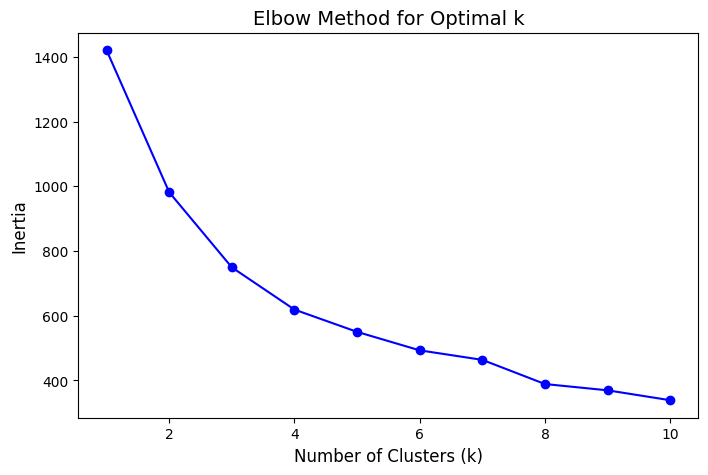

In [23]:
# Menyimpan nilai inertia untuk berbagai jumlah cluster
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_pca_final.iloc[:, 1:])  # tanpa kolom 'country'
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.show()

## Silhouette Score

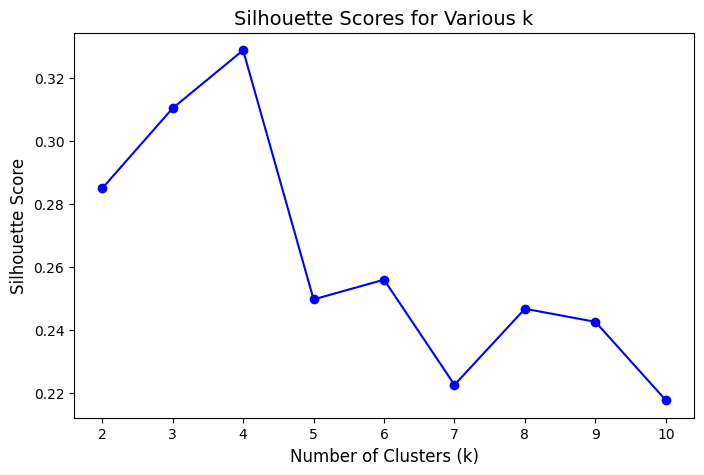

In [24]:
# Menyimpan nilai silhouette untuk k = 2 hingga 10
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_pca_final.iloc[:, 1:])
    sil_score = silhouette_score(df_pca_final.iloc[:, 1:], labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Scores for Various k', fontsize=14)
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(df_pca_final.iloc[:, 1:])

# Menghitung Silhouette Score
sil_score = silhouette_score(df_pca_final.iloc[:, 1:], cluster_labels)
print("Silhouette Score:", round(sil_score, 2))

Silhouette Score: 0.31


In [30]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df_pca_final['Cluster'] = kmeans.fit_predict(df_pca_final.iloc[:, 1:])
df_pca_final.head()

,country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


In [31]:
df_pca_final['Cluster'].value_counts()

,count
Cluster,
0,93
1,74


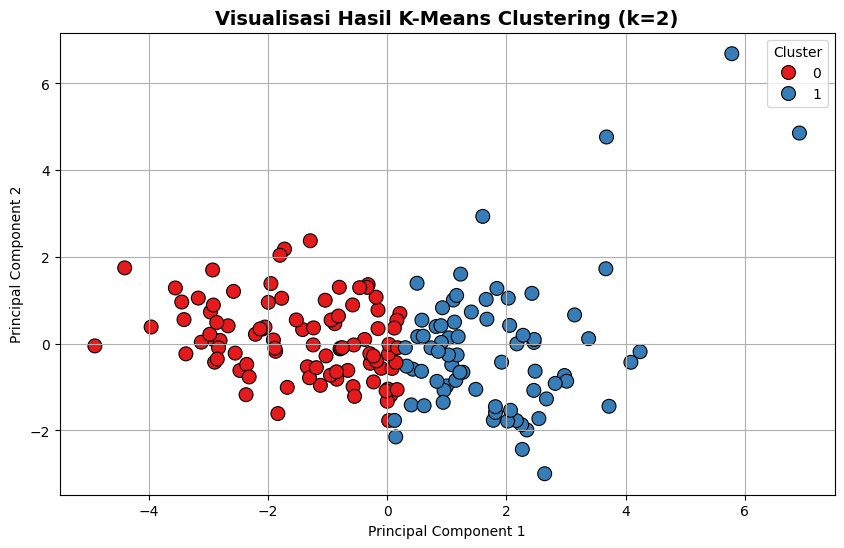

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_final,
    palette='Set1',
    s=100,
    edgecolor='k'
)
plt.title('Visualisasi Hasil K-Means Clustering (k=2)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Simpan Data K-Means Clustering

In [33]:
df_pca_final.to_csv("hasil_clustering.csv", index=False)